In [1]:
# import mmseg
from hubmap_modules import *
from mmseg.datasets.transforms import *

In [2]:
from mmengine.registry import TRANSFORMS, DATASETS
# from mmseg.registry import TRANSFORMS

In [3]:
TRANSFORMS

                              Registry of transform                               
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Names                ┃ Objects                                                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ CenterCrop           │ <class 'mmcv.transforms.processing.CenterCrop'>         │
│ Compose              │ <class 'mmcv.transforms.wrappers.Compose'>              │
│ ImageToTensor        │ <class 'mmcv.transforms.formatting.ImageToTensor'>      │
│ KeyMapper            │ <class 'mmcv.transforms.wrappers.KeyMapper'>            │
│ LoadAnnotations      │ <class 'mmcv.transforms.loading.LoadAnnotations'>       │
│ LoadImageFromFile    │ <class 'mmcv.transforms.loading.LoadImageFromFile'>     │
│ MultiScaleFlipAug    │ <class 'mmcv.transforms.processing.MultiScaleFlipAug'>  │
│ Normalize            │ <class 'mmcv.transforms.processing.Normalize'>          │
│ Pa

In [11]:
data_root = '/home/ec2-user/hubmap-hacking-the-human-vasculature/all_dataset_files/all_dataset_mmdet_fold_0/'
ann_file = 'annotations/validation_annotations.json'
img_dir = 'validation_images/'

input_size = (224, 224)
default_scope = 'mmseg'

train_pipeline = [
    dict(type='LoadImageFromFile'),
    LoadSegMask(),
    BoxJitter(),
    ROIAlign(output_size=input_size),
    dict(type='RandomFlip', prob=0.5, direction=['horizontal', 'vertical']),
#     FormatSegMask(),
#     PackSegInputs()
    ]
test_pipeline = [
    dict(
        type='MultiScaleFlipAug',
        scales=input_size,
        transforms=[
            dict(type='LoadImageFromFile'),
            LoadSegMask(),
            ROIAlign(output_size=input_size),
            dict(type='RandomFlip', prob=0.5, direction=['horizontal', 'vertical']),
            FormatSegMask(),
            PackSegInputs()
        ]
    )
]

# train_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(type='LoadSegMask')]

dataset = HubMapSegTrainDataset(data_root=data_root, ann_file=ann_file, img_dir=img_dir, pipeline=train_pipeline)

# dataset = CityscapesDataset(ann_file=ann_file, pipeline=train_pipeline)
print(dataset[0])

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
{'filename': '0033bbc76b6b.tif', 'img_path': '/home/ec2-user/hubmap-hacking-the-human-vasculature/all_dataset_files/all_dataset_mmdet_fold_0/validation_images/0033bbc76b6b.tif', 'bbox': [143, 138, 181, 228], 'segmentation': [169, 228, 168, 228, 167, 228, 166, 228, 165, 228, 164, 228, 163, 228, 163, 227, 162, 227, 161, 227, 161, 226, 160, 226, 160, 225, 159, 225, 159, 224, 158, 224, 158, 223, 158, 222, 158, 221, 158, 220, 157, 220, 157, 219, 157, 218, 157, 217, 156, 217, 156, 216, 156, 215, 156, 214, 156, 213, 155, 213, 155, 212, 154, 212, 154, 211, 153, 211, 153, 210, 153, 209, 152, 209, 152, 208, 152, 207, 151, 207, 150, 207, 150, 206, 149, 206, 149, 205, 148, 205, 148, 204, 148, 203, 147, 203, 147, 202, 147, 201, 147, 200, 146, 200, 146, 199, 146, 198, 146, 197, 145, 197, 145, 196, 145, 195, 144, 195, 144, 194, 144, 193, 144, 192, 144, 191, 144, 190, 144, 189, 144, 188, 144, 187, 144, 186, 144, 185, 14

In [12]:
x = dataset[0]
x['data_sample'][0].gt_sem_seg.data

KeyError: 'data_sample'

(224, 224, 3)


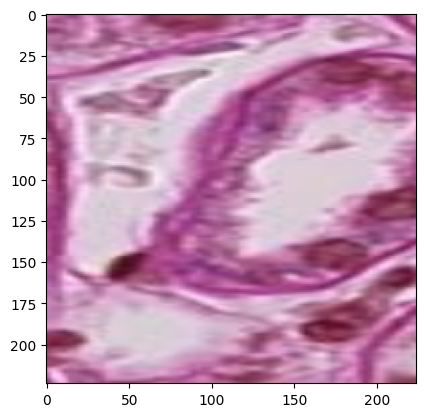

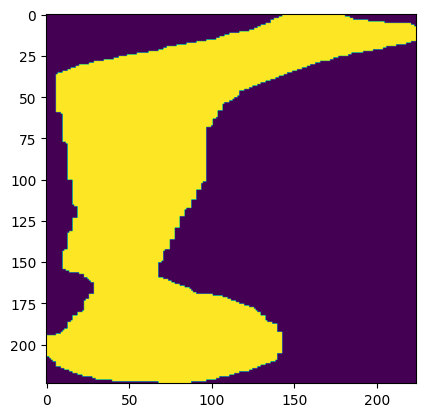

[0 1]


In [13]:
import matplotlib.pyplot as plt
x = dataset[50]
print(x['img'].shape)
plt.imshow(x['img'].astype(np.uint8))
plt.show()
plt.imshow(x['gt_seg_map'])
plt.show()
print(np.unique(x['gt_seg_map']))